In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree,preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import classification_report, mean_squared_error

In [2]:
cd=pd.read_csv("Company_Data.csv")

In [3]:
cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
cd.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [5]:
cd.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
cd.shape

(400, 11)

In [8]:
cd.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [9]:
cd.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [10]:
cd.value_counts()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  Education  Urban  US 
0.00   139        24      0            358         185    Medium     79   15         No     No     1
8.65   123        76      18           218         120    Medium     29   14         No     Yes    1
8.75   143        77      25           448         156    Medium     43   17         Yes    Yes    1
8.74   155        80      0            237         124    Medium     37   14         Yes    No     1
8.73   129        76      16           58          121    Medium     69   12         Yes    Yes    1
                                                                                                  ..
6.01   131        29      11           335         127    Bad        33   12         Yes    Yes    1
5.99   117        42      10           371         121    Bad        26   14         Yes    Yes    1
5.98   124        56      11           447         134    Medium     53   12         No     Yes 

In [11]:
cd.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [12]:
cd.replace({"Bad":0,"Medium":1,"Good":2,"Yes":1,"No":0},inplace=True)
cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [13]:
x=cd.iloc[:,1:]
y=cd.iloc[:,0]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,1,55,11,0,1
397,162,26,12,368,159,1,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [14]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [16]:
model=DecisionTreeRegressor(max_depth=3)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [17]:
preds=model.predict(x_test)
preds

array([ 7.40590909,  4.68704545, 10.29317073,  4.68704545,  7.40590909,
        4.68704545, 10.29317073,  7.40590909, 10.29317073, 10.29317073,
        6.46971698,  7.40590909,  7.40590909,  6.46971698,  5.534     ,
        7.40590909,  8.07571429, 10.29317073,  6.46971698,  6.46971698,
        7.40590909,  6.46971698,  4.68704545,  6.46971698,  4.68704545,
        6.46971698,  6.46971698,  9.75      ,  6.46971698,  6.46971698,
       10.29317073, 10.29317073,  6.46971698,  4.68704545, 10.29317073,
        6.46971698,  4.68704545,  6.46971698, 10.29317073,  4.68704545,
        4.68704545,  6.46971698,  7.40590909, 10.29317073,  8.07571429,
        6.46971698,  7.40590909,  7.40590909,  6.46971698,  6.46971698,
        9.75      ,  9.75      ,  9.75      , 10.29317073,  6.46971698,
        4.68704545,  6.46971698, 10.29317073, 10.29317073, 10.29317073,
       10.29317073, 10.29317073,  7.40590909,  6.46971698,  6.46971698,
        6.46971698, 10.29317073,  9.75      ,  4.68704545, 10.29

In [18]:
pd.crosstab(y_test,preds)

col_0,4.687045,5.534000,6.469717,7.405909,8.075714,9.750000,10.293171,14.326667
Sales,,,,,,,,
0.91,1,0,0,0,0,0,0,0
2.23,1,0,0,0,0,0,0,0
2.86,1,0,0,0,0,0,0,0
3.02,0,0,0,1,0,0,0,0
3.07,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
13.44,0,0,0,0,0,0,1,0
13.55,0,0,0,0,0,0,1,0
13.91,0,0,0,0,0,0,0,1


In [19]:
mean_squared_error(y_test,preds)

4.806952738698439

In [20]:
label=x_test.columns
label

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

[Text(465.0, 792.75, 'ShelveLoc <= 1.5\nmse = 7.665\nsamples = 280\nvalue = 7.356'),
 Text(232.5, 566.25, 'Price <= 105.5\nmse = 6.258\nsamples = 224\nvalue = 6.743'),
 Text(116.25, 339.75, 'Age <= 49.0\nmse = 5.425\nsamples = 74\nvalue = 8.356'),
 Text(58.125, 113.25, 'mse = 3.124\nsamples = 30\nvalue = 9.75'),
 Text(174.375, 113.25, 'mse = 4.767\nsamples = 44\nvalue = 7.406'),
 Text(348.75, 339.75, 'ShelveLoc <= 0.5\nmse = 4.751\nsamples = 150\nvalue = 5.947'),
 Text(290.625, 113.25, 'mse = 3.848\nsamples = 44\nvalue = 4.687'),
 Text(406.875, 113.25, 'mse = 4.193\nsamples = 106\nvalue = 6.47'),
 Text(697.5, 566.25, 'Price <= 135.0\nmse = 5.782\nsamples = 56\nvalue = 9.807'),
 Text(581.25, 339.75, 'Price <= 74.5\nmse = 3.796\nsamples = 44\nvalue = 10.568'),
 Text(523.125, 113.25, 'mse = 1.171\nsamples = 3\nvalue = 14.327'),
 Text(639.375, 113.25, 'mse = 2.878\nsamples = 41\nvalue = 10.293'),
 Text(813.75, 339.75, 'Age <= 62.5\nmse = 3.155\nsamples = 12\nvalue = 7.017'),
 Text(755.625,

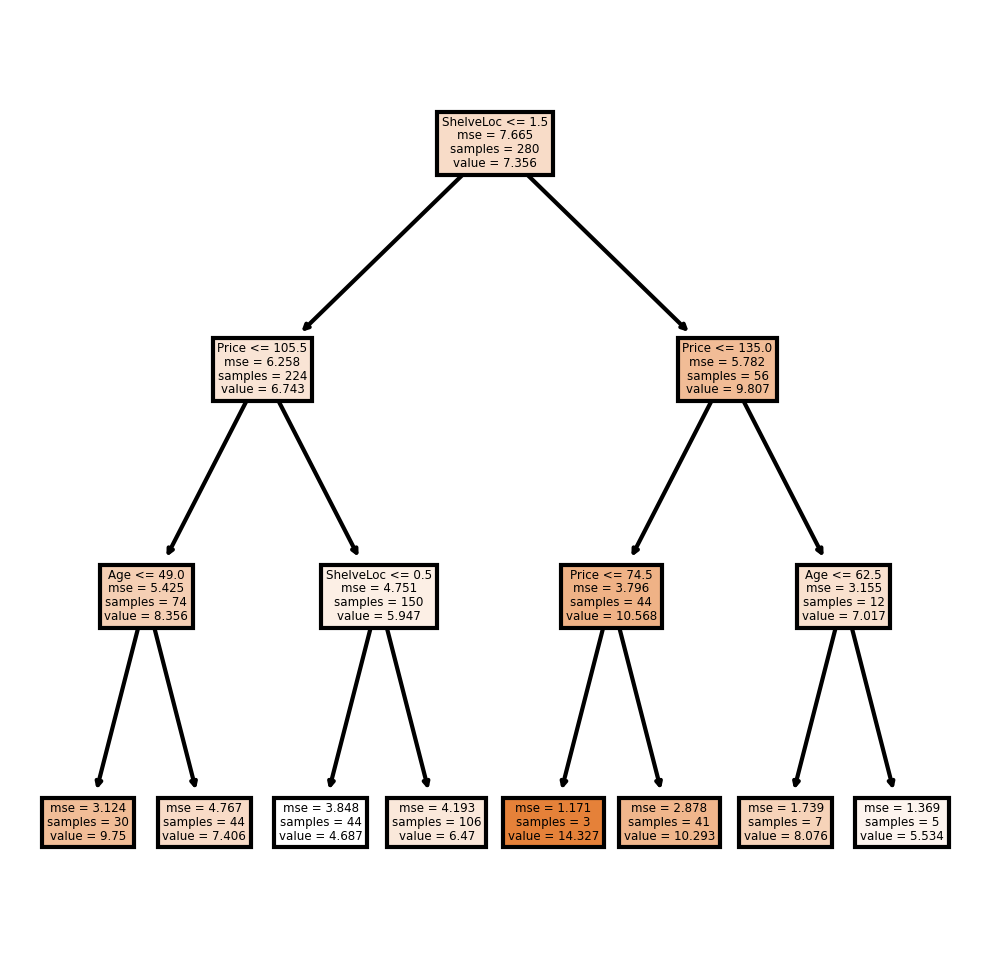

In [21]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','Us']
cn=['Sales']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [22]:
model.score(x_test,y_test)

0.433126199101897

## Decission Tree Classifier 

In [23]:
cd1=pd.read_csv("company_data.csv")

In [24]:
cd1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [25]:
cd1['status']=cd1['Sales'].apply(lambda Sales:'Low' if Sales <=7.5 else 'High')
cd1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,status
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [26]:
cd1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
status          object
dtype: object

In [27]:
encoder=preprocessing.LabelEncoder()

for i in cd1.columns:
    print(i)
    if cd1[i].dtypes==object:
        cd1[i]=encoder.fit_transform(cd1[i])
    else:
        pass

Sales
CompPrice
Income
Advertising
Population
Price
ShelveLoc
Age
Education
Urban
US
status


In [28]:
cd1.drop('Sales',axis=1,inplace=True)

In [29]:
cd1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,status
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [30]:
x1=cd1.iloc[:,0:10]
y1=cd1.iloc[:,10]
x1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [31]:
y1

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: status, Length: 400, dtype: int32

In [32]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.3,random_state=42)

In [34]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
model1.fit(x_train1,y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [41]:
preds1=model1.predict(x_test1)
preds1

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [42]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test1,preds1))

[[53 12]
 [27 28]]


[Text(153.45000000000002, 190.26, 'X[4] <= 90.5\nentropy = 0.998\nsamples = 280\nvalue = [133, 147]'),
 Text(83.7, 135.9, 'X[5] <= 0.5\nentropy = 0.422\nsamples = 35\nvalue = [32, 3]'),
 Text(55.800000000000004, 81.53999999999999, 'X[3] <= 302.0\nentropy = 0.918\nsamples = 9\nvalue = [6, 3]'),
 Text(27.900000000000002, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(83.7, 27.180000000000007, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(223.20000000000002, 135.9, 'X[5] <= 0.5\nentropy = 0.978\nsamples = 245\nvalue = [101, 144]'),
 Text(167.4, 81.53999999999999, 'X[6] <= 63.5\nentropy = 0.616\nsamples = 59\nvalue = [9, 50]'),
 Text(139.5, 27.180000000000007, 'entropy = 0.75\nsamples = 42\nvalue = [9, 33]'),
 Text(195.3, 27.180000000000007, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(279.0, 81.53999999999999, 'X[4] <= 135.5\nentropy = 1.0\nsamples = 1

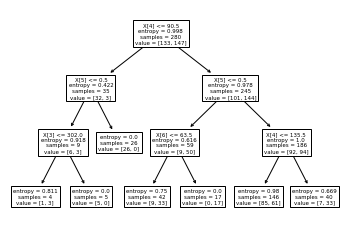

In [43]:
tree.plot_tree(model1)

[Text(1065.625, 1981.875, 'Price <= 90.5\nentropy = 0.998\nsamples = 280\nvalue = [133, 147]\nclass = High'),
 Text(581.25, 1415.625, 'ShelveLoc <= 0.5\nentropy = 0.422\nsamples = 35\nvalue = [32, 3]\nclass = low'),
 Text(387.5, 849.375, 'Population <= 302.0\nentropy = 0.918\nsamples = 9\nvalue = [6, 3]\nclass = low'),
 Text(193.75, 283.125, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = High'),
 Text(581.25, 283.125, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = low'),
 Text(775.0, 849.375, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0]\nclass = low'),
 Text(1550.0, 1415.625, 'ShelveLoc <= 0.5\nentropy = 0.978\nsamples = 245\nvalue = [101, 144]\nclass = High'),
 Text(1162.5, 849.375, 'Age <= 63.5\nentropy = 0.616\nsamples = 59\nvalue = [9, 50]\nclass = High'),
 Text(968.75, 283.125, 'entropy = 0.75\nsamples = 42\nvalue = [9, 33]\nclass = High'),
 Text(1356.25, 283.125, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]\nclass = High'),
 Text(1937.5, 849.375, 'Price <= 135.5\n

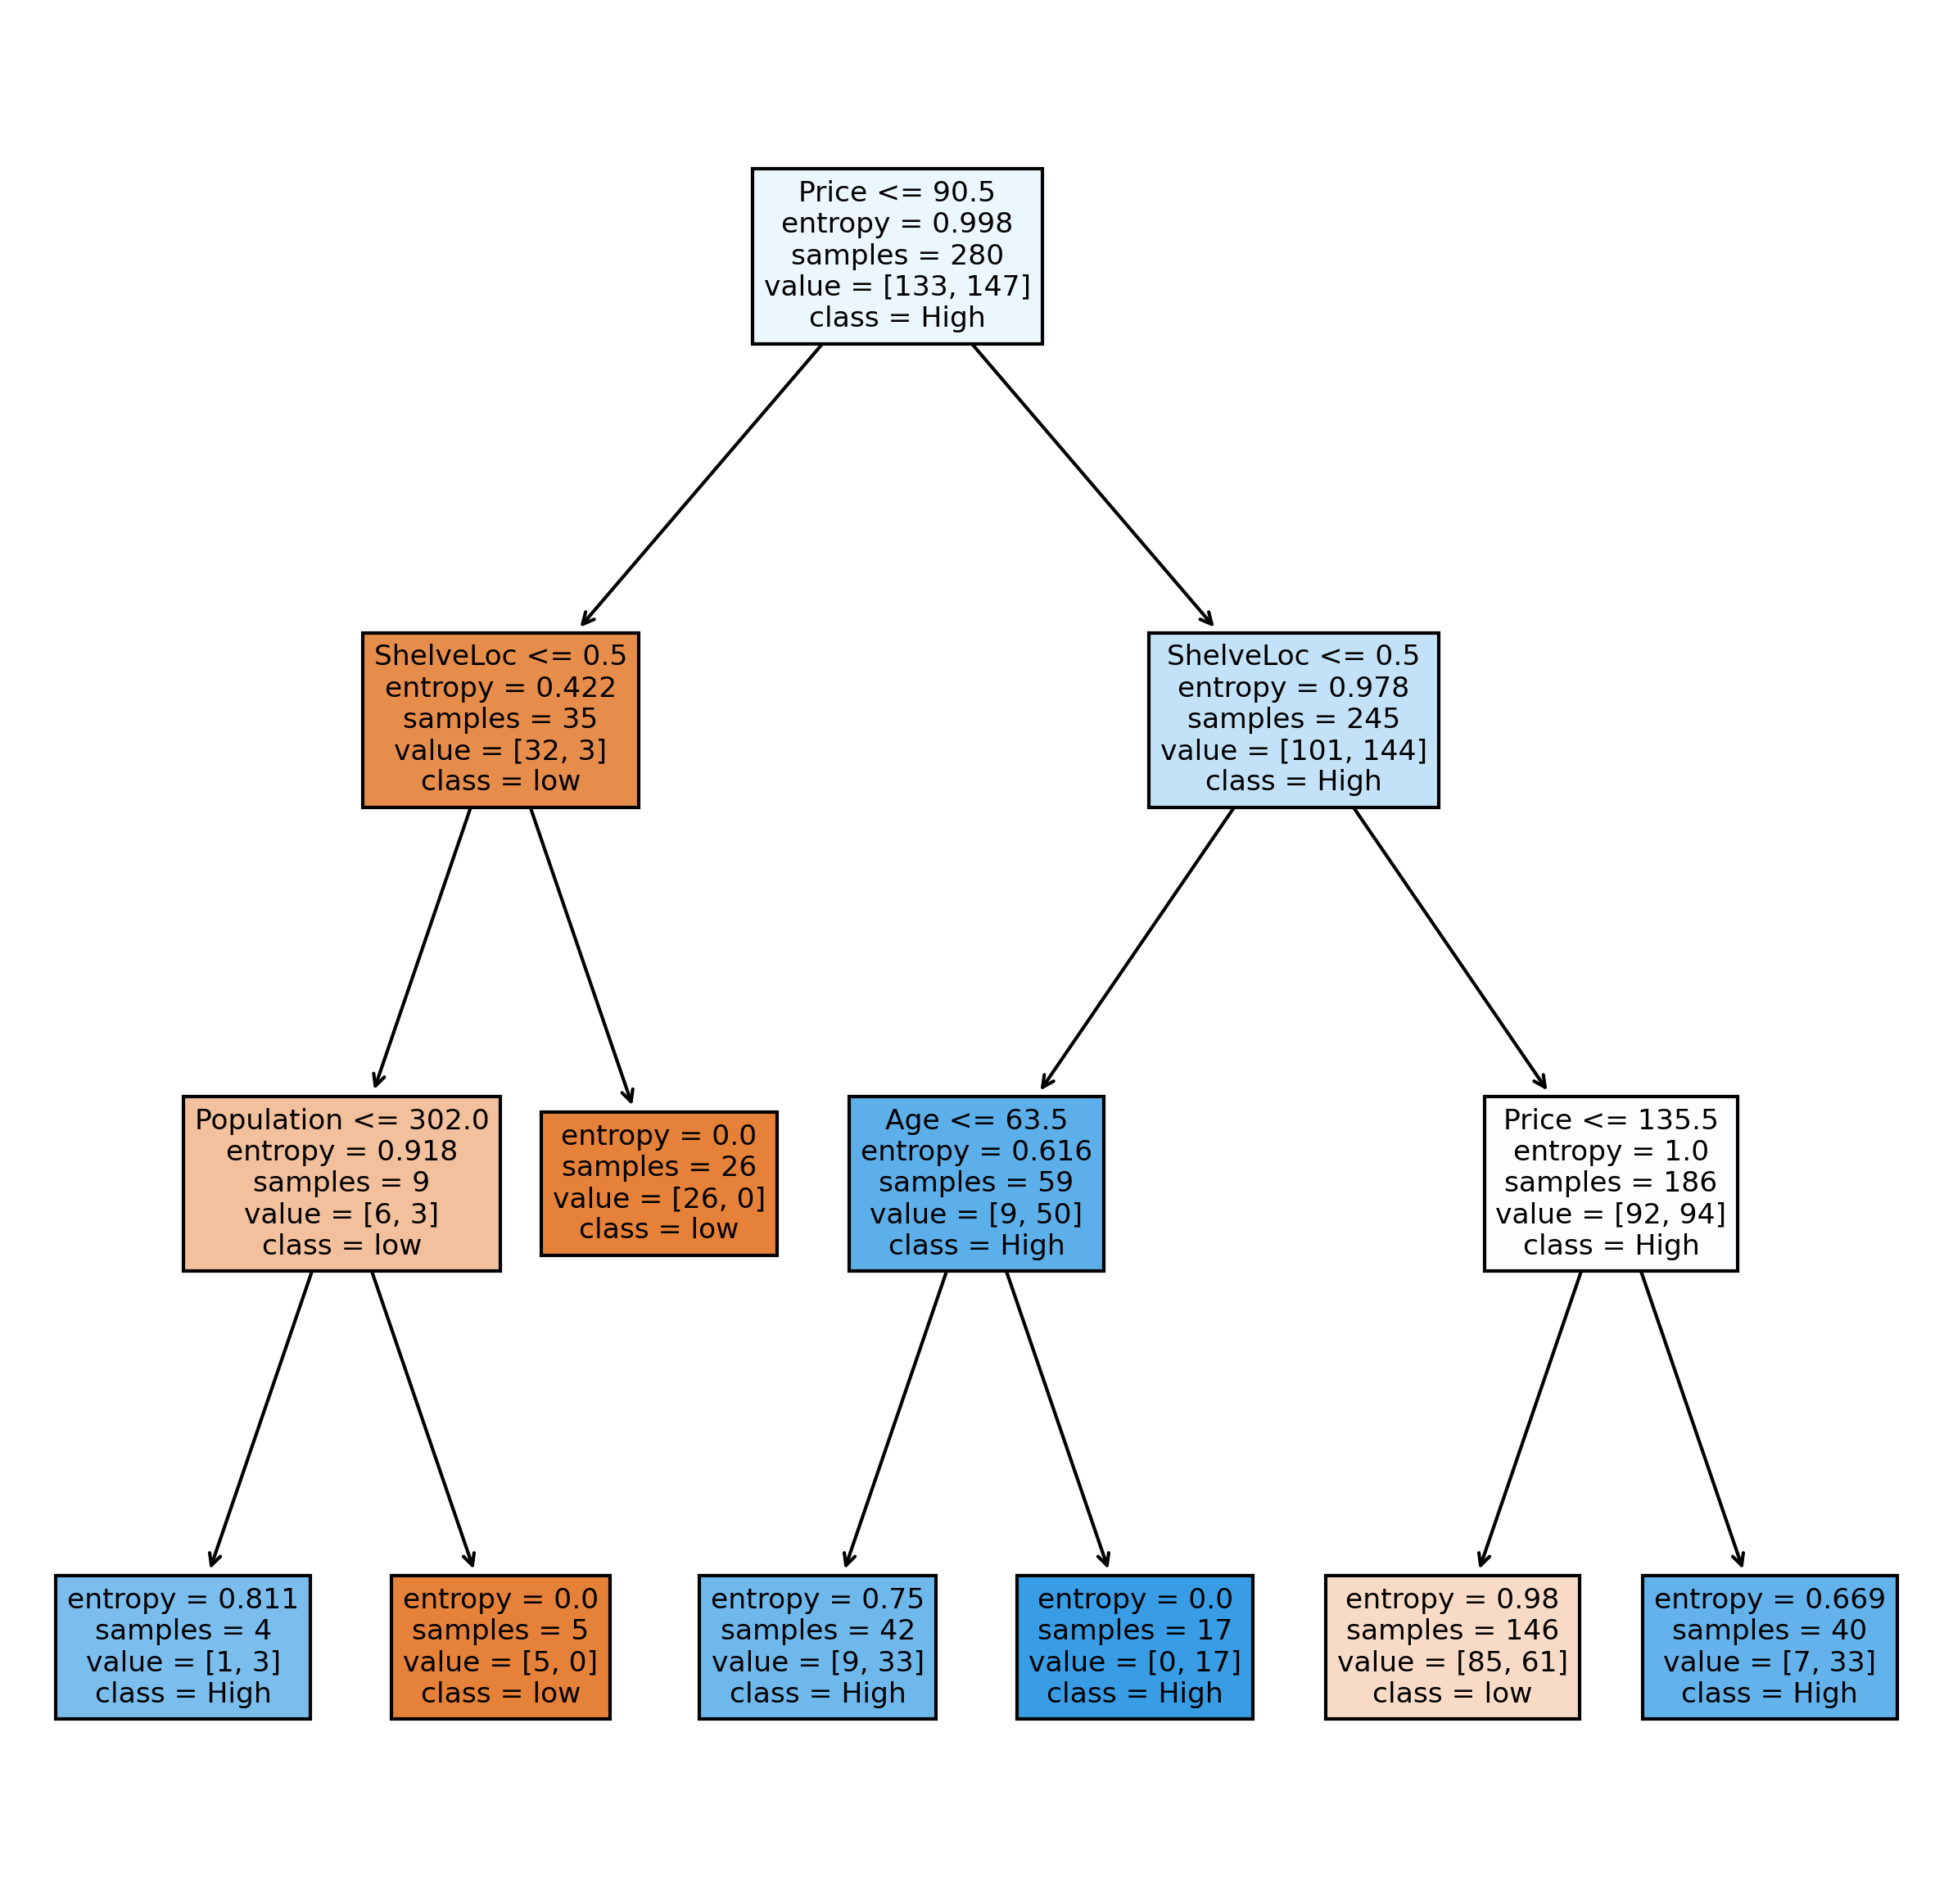

In [44]:
fn=cd1.columns
cn=['low','High']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=300)
tree.plot_tree(model1,feature_names=fn,class_names=cn,filled=True)

In [46]:
np.mean(preds1==y_test1)

0.675